In [26]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("GlobalLandTemperaturesByCity.csv")
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [27]:
data.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [28]:
data = data.dropna()

In [29]:
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [30]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599206,2013-04-01,7.710,0.182,Zwolle,Netherlands,52.24N,5.26E
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E


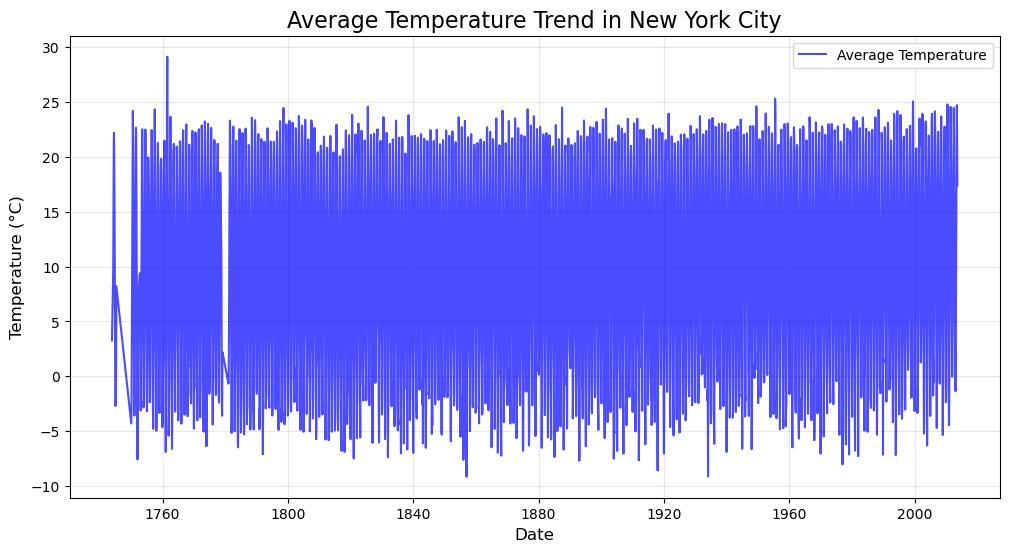

In [31]:
# Filter the dataset for a specific city (New York City) and extract relevant columns.
new_data = data[data['City'] == 'New York'][['City', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Latitude', 'Longitude']]
new_data['dt'] = pd.to_datetime(new_data['dt'])

plt.figure(figsize=(12, 6))
plt.plot(new_data['dt'], new_data['AverageTemperature'], color='blue', label='Average Temperature', alpha=0.7)
plt.title('Average Temperature Trend in New York City', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

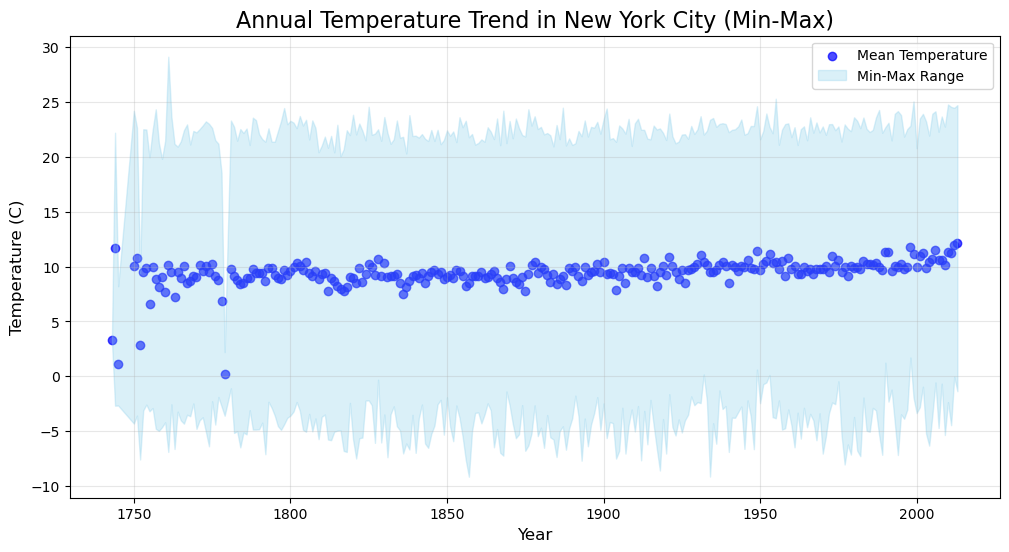

In [32]:
nyc_data = data[data['City'] == 'New York'][['dt', 'AverageTemperature']]
nyc_data['dt'] = pd.to_datetime(nyc_data['dt'])
nyc_data['Year'] = nyc_data['dt'].dt.year
annual_stats = (nyc_data.groupby('Year')['AverageTemperature'].agg(['min', 'max', 'mean']).dropna())

plt.figure(figsize=(12, 6))
plt.scatter(annual_stats.index, annual_stats['mean'], color='blue', label='Mean Temperature', alpha=0.7)
plt.fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], color='skyblue', alpha=0.3, label='Min-Max Range')
plt.title('Annual Temperature Trend in New York City (Min-Max)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (C)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()